In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [3]:
report_card_df = pd.read_csv(r'C:\Users\Luthfi\Downloads\2006_-_2011_NYS_Math_Test_Results_By_Grade_-_School_Level_-_By_Disability_Status.csv')
report_card_df.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,General Ed,29,675.0,1.0,3.4,5.0,17.2,17.0,58.6,6.0,20.7,23.0,79.3
1,01M015,3,2006,Special Ed,10,644.0,1.0,10.0,6.0,60.0,3.0,30.0,0.0,0.0,3.0,30.0
2,01M015,3,2007,General Ed,26,675.0,1.0,3.8,3.0,11.5,18.0,69.2,4.0,15.4,22.0,84.6
3,01M015,3,2007,Special Ed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M015,3,2008,General Ed,30,669.0,0.0,0.0,4.0,13.3,24.0,80.0,2.0,6.7,26.0,86.7


In [4]:
report_card_df.isnull().any()


DBN                 False
Grade               False
Year                False
Category            False
Number Tested       False
Mean Scale Score     True
Level 1 #            True
Level 1 %            True
Level 2 #            True
Level 2 %            True
Level 3 #            True
Level 3 %            True
Level 4 #            True
Level 4 %            True
Level 3+4 #          True
Level 3+4 %          True
dtype: bool

In [5]:
report_card_df.isnull().sum()


DBN                     0
Grade                   0
Year                    0
Category                0
Number Tested           0
Mean Scale Score    14071
Level 1 #            3789
Level 1 %            3789
Level 2 #            3789
Level 2 %            3789
Level 3 #            3789
Level 3 %            3789
Level 4 #            3789
Level 4 %            3789
Level 3+4 #          3789
Level 3+4 %          3789
dtype: int64

In [6]:
report_card_df_cleaned = report_card_df.dropna(how='all')
report_card_df_cleaned


,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,General Ed,29,675.0,1.0,3.4,5.0,17.2,17.0,58.6,6.0,20.7,23.0,79.3
1,01M015,3,2006,Special Ed,10,644.0,1.0,10.0,6.0,60.0,3.0,30.0,0.0,0.0,3.0,30.0
2,01M015,3,2007,General Ed,26,675.0,1.0,3.8,3.0,11.5,18.0,69.2,4.0,15.4,22.0,84.6
3,01M015,3,2007,Special Ed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M015,3,2008,General Ed,30,669.0,0.0,0.0,4.0,13.3,24.0,80.0,2.0,6.7,26.0,86.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55081,75X723,All Grades,2009,Special Ed,193,NaN,78.0,40.4,83.0,43.0,28.0,14.5,4.0,2.1,32.0,16.6
55082,75X723,All Grades,2010,General Ed,9,NaN,5.0,55.6,3.0,33.3,1.0,11.1,0.0,0.0,1.0,11.1
55083,75X723,All Grades,2010,Special Ed,233,NaN,152.0,65.2,72.0,30.9,9.0,3.9,0.0,0.0,9.0,3.9
55084,75X723,All Grades,2011,General Ed,9,585.0,7.0,77.8,1.0,11.1,1.0,11.1,0.0,0.0,1.0,11.1


In [7]:
report_card_df_no_missing=report_card_df.dropna()
report_card_df_no_missing

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,General Ed,29,675.0,1.0,3.4,5.0,17.2,17.0,58.6,6.0,20.7,23.0,79.3
1,01M015,3,2006,Special Ed,10,644.0,1.0,10.0,6.0,60.0,3.0,30.0,0.0,0.0,3.0,30.0
2,01M015,3,2007,General Ed,26,675.0,1.0,3.8,3.0,11.5,18.0,69.2,4.0,15.4,22.0,84.6
4,01M015,3,2008,General Ed,30,669.0,0.0,0.0,4.0,13.3,24.0,80.0,2.0,6.7,26.0,86.7
5,01M015,3,2008,Special Ed,7,663.0,0.0,0.0,2.0,28.6,5.0,71.4,0.0,0.0,5.0,71.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55069,75X723,8,2009,Special Ed,26,596.0,13.0,50.0,13.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
55071,75X723,8,2010,Special Ed,36,596.0,31.0,86.1,5.0,13.9,0.0,0.0,0.0,0.0,0.0,0.0
55073,75X723,8,2011,Special Ed,31,592.0,24.0,77.4,7.0,22.6,0.0,0.0,0.0,0.0,0.0,0.0
55084,75X723,All Grades,2011,General Ed,9,585.0,7.0,77.8,1.0,11.1,1.0,11.1,0.0,0.0,1.0,11.1


In [8]:
report_card_df_no_missing.isnull().sum()

DBN                 0
Grade               0
Year                0
Category            0
Number Tested       0
Mean Scale Score    0
Level 1 #           0
Level 1 %           0
Level 2 #           0
Level 2 %           0
Level 3 #           0
Level 3 %           0
Level 4 #           0
Level 4 %           0
Level 3+4 #         0
Level 3+4 %         0
dtype: int64

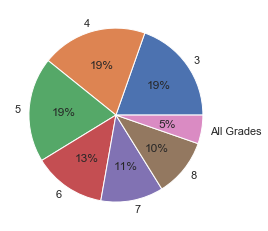

In [9]:
rc_df=report_card_df_no_missing
#rc_df['Grade'].value_counts().plot(kind='bar')
rc_grade = rc_df['Grade'].value_counts()
labels=rc_grade.index.tolist()
plt.pie(rc_grade,labels=labels,autopct='%i%%');

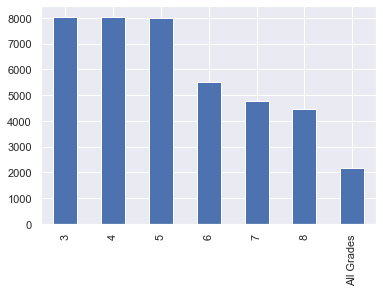

In [10]:
rc_df['Grade'].value_counts().plot(kind='bar')